# Capstone 2 - Lending Club Loan Paid or Charged Off Prediction

# Documentation

Documentation is the sixth step in the Data Science Method.  The following will be performed in this step:

1. Review the Results
2. Finalize Code
3. Finalize Documentation
4. Create a Project Report
5. Create a Slide Deck for the Executive Audience

In [1]:
#load python packages
import os
import pandas as pd
import pandas.api.types as ptypes
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings # For handling error messages.
#warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

# Best Model - Logistic Regression

In [2]:
# Read data output created in the EDA step
df = pd.read_csv("../EDA/data/Cap2_step3_output.csv", dtype={'verification_status_joint':object,'hardship_type':object, 'hardship_reason':object, 'hardship_status':object, 'hardship_loan_status':object, 'settlement_status':object}, index_col="Unnamed: 0")
df.head(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,initial_list_status,application_type,verification_status_joint,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_loan_status,debt_settlement_flag,settlement_status
0,2500,13.56,55000.0,18.24,0.0,1.0,0.0,45.0,1.0,4341,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
1,30000,18.94,90000.0,26.52,0.0,0.0,71.0,75.0,1.0,12315,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
2,5000,17.97,59280.0,10.51,0.0,0.0,0.0,0.0,0.0,4599,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
3,4000,18.94,92000.0,16.74,0.0,0.0,0.0,0.0,0.0,5468,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN
4,30000,16.14,57250.0,26.35,0.0,0.0,0.0,0.0,0.0,829,...,w,Individual,NaN,N,NaN,NaN,NaN,NaN,N,NaN


In [3]:
df.shape

(2150627, 87)

In [4]:
# Drop unwanted columns
df_sel = df.drop(['title', 'zip_code', 'addr_state', 'recoveries', 'debt_settlement_flag', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'settlement_status'], axis=1)

In [5]:
# Drop irrelevant loan_status

df_sel.reset_index()
df_sel = df_sel[~(df_sel['loan_status'] == 'In Grace Period')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Current')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Late (31-120 days)')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Default')]
df_sel = df_sel[~(df_sel['loan_status'] == 'Late (16-30 days)')]
df_sel.shape

(1250411, 78)

In [6]:
# Loan status:
# Setting '%Fully Paid' to 0
# Setting '%Charges Off' to 1

df_sel['loan_status'] = df_sel['loan_status'].replace(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'], '0')
df_sel['loan_status'] = df_sel['loan_status'].replace(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'], '1')

In [7]:
df_sel['loan_status'] = pd.to_numeric(df_sel['loan_status'])

In [8]:
# Create a list of object columns.  
cols_obj = []
for col in df_sel.columns:
    if df_sel[col].dtype == object:
        cols_obj.append(col)

In [9]:
df_sel = pd.concat([df_sel.drop(cols_obj, axis=1), pd.get_dummies(df_sel[cols_obj])], axis=1)
df_sel.head(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_loan_status_Current,hardship_loan_status_In Grace Period,hardship_loan_status_Issued,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days)
100,30000,22.35,100000.0,30.46,0.0,0.0,51.0,84.0,1.0,15603,...,0,0,0,0,0,0,0,0,0,0
152,40000,16.14,45000.0,50.53,0.0,0.0,0.0,0.0,0.0,34971,...,0,0,0,0,0,0,0,0,0,0
170,20000,7.56,100000.0,18.92,0.0,0.0,48.0,0.0,0.0,25416,...,0,0,0,0,0,0,0,0,0,0
186,4500,11.31,38500.0,4.64,0.0,0.0,25.0,0.0,0.0,4472,...,0,0,0,0,0,0,0,0,0,0
269,20000,17.97,57000.0,22.18,0.0,0.0,0.0,0.0,0.0,33356,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Using a sample size of 200,000 for modeling, due to Memory error when using all observations.
df_sample = df_sel.sample(200000)
df_sample.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_loan_status_Current,hardship_loan_status_In Grace Period,hardship_loan_status_Issued,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days)
2131378,3000,10.62,53000.0,19.83,1.0,0.0,5.0,0.0,0.0,20168,...,0,0,0,0,0,0,0,0,0,0
787458,10000,12.99,50000.0,8.03,0.0,1.0,0.0,0.0,0.0,7600,...,0,0,0,0,0,0,0,0,0,0
1866201,24000,12.39,80000.0,16.41,0.0,1.0,0.0,0.0,0.0,20812,...,0,0,0,0,0,0,0,0,0,0
1704833,31300,16.20,70000.0,33.45,0.0,0.0,0.0,0.0,0.0,29510,...,0,0,0,0,0,0,0,0,0,0
1018455,30000,11.53,118000.0,16.82,0.0,0.0,29.0,0.0,0.0,17625,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = df_sample['loan_status']
X = df_sample.drop(['loan_status'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [13]:
from sklearn import preprocessing as ppg

scaler = ppg.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scaled

array([[-0.77081154,  0.40552027, -1.09417137, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [-0.47282651,  0.21752157, -0.26944229, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [ 0.24233755, -0.48800165,  0.31271941, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       ...,
       [ 1.2525068 , -1.27590632, -0.56052314, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [-0.83040854, -0.27676715, -1.07800021, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [-0.52050411, -1.28646805, -0.43115388, ..., -0.002582  ,
        -0.0435537 , -0.01154778]])

In [14]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.10455477, -0.87244843, -0.85160399, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [-0.23443849, -0.24930667, -0.26944229, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [ 2.50702376,  0.96317934,  0.53911563, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       ...,
       [-0.80656974, -1.08157059,  1.99451989, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [-0.23443849,  0.28511661, -0.59286546, ..., -0.002582  ,
        -0.0435537 , -0.01154778],
       [ 0.62375839, -0.81752746,  0.79785416, ..., -0.002582  ,
        -0.0435537 , -0.01154778]])

# Feature importance with Forest of Trees

In [15]:
X_train_scaled.shape

(150000, 144)

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest = forest.fit(X_train_scaled, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 14 (0.188408)
2. feature 12 (0.142152)
3. feature 0 (0.068070)
4. feature 13 (0.033810)
5. feature 1 (0.025436)
6. feature 63 (0.019018)
7. feature 64 (0.018068)
8. feature 2 (0.017481)
9. feature 3 (0.017328)
10. feature 9 (0.016809)
11. feature 10 (0.016667)
12. feature 47 (0.015883)
13. feature 32 (0.015701)
14. feature 28 (0.015390)
15. feature 46 (0.015053)
16. feature 21 (0.014825)
17. feature 36 (0.014822)
18. feature 31 (0.014821)
19. feature 48 (0.014497)
20. feature 43 (0.014283)
21. feature 5 (0.012679)
22. feature 42 (0.012529)
23. feature 6 (0.012180)
24. feature 65 (0.010552)
25. feature 27 (0.010083)
26. feature 37 (0.009816)
27. feature 16 (0.008721)
28. feature 35 (0.008385)
29. feature 4 (0.008299)
30. feature 20 (0.008119)
31. feature 25 (0.007812)
32. feature 38 (0.007782)
33. feature 26 (0.007765)
34. feature 7 (0.007019)
35. feature 30 (0.006751)
36. feature 66 (0.006719)
37. feature 24 (0.006358)
38. feature 22 (0.006293)
39. feature 2

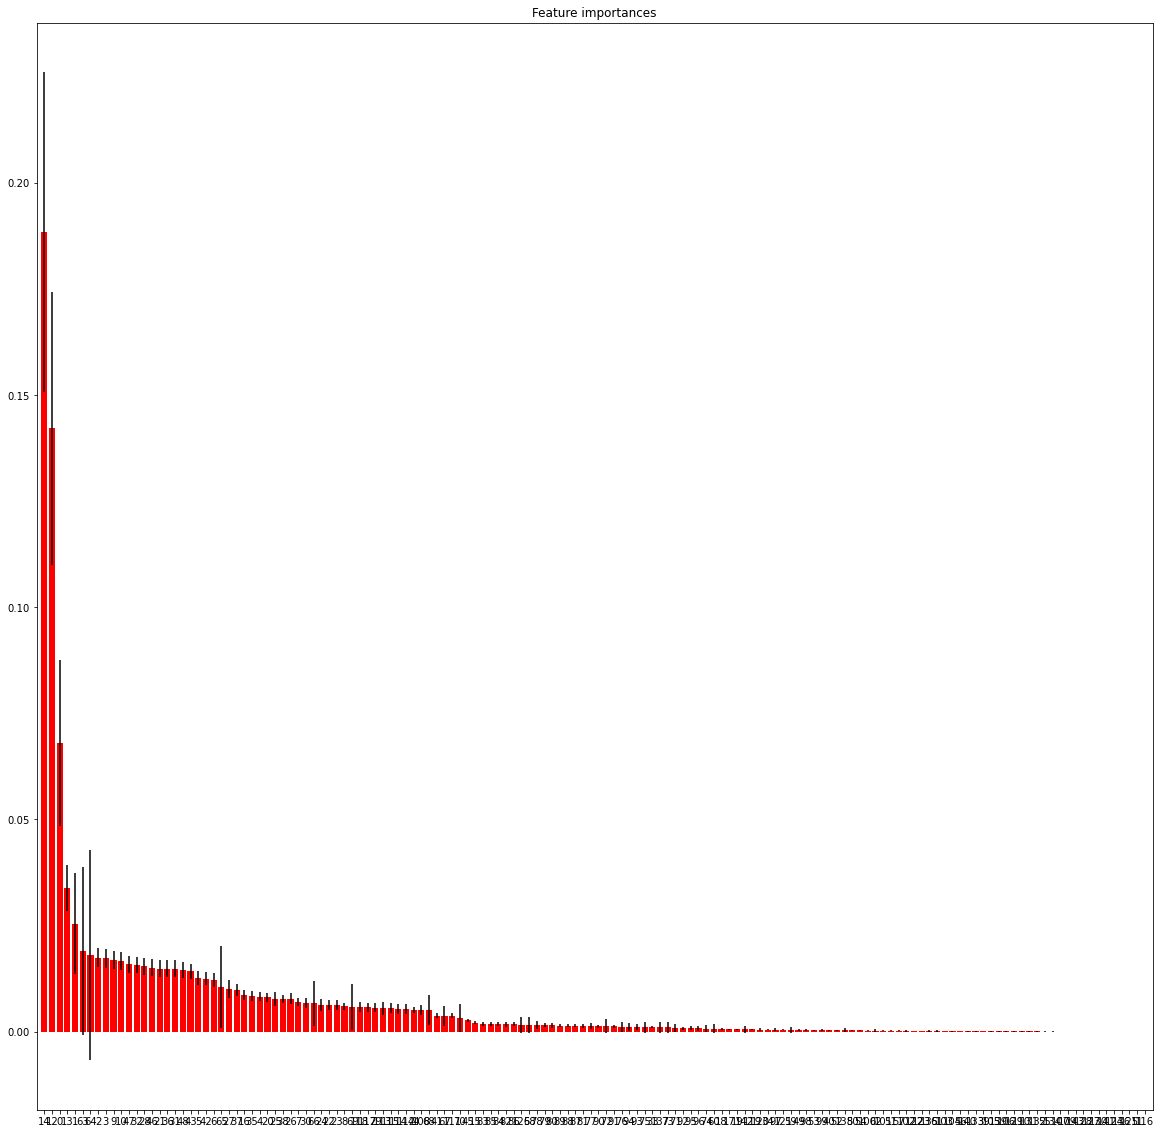

In [17]:
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

# Feature selection using SelectFromModel

In [265]:
# Feature selection based on the above feature importance
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(forest, prefit=True, threshold=0.019)
X_train_new = model.transform(X_train_scaled)
X_train_new.shape

(150000, 6)

In [266]:
X_test_new = model.transform(X_test_scaled)
X_test_new.shape

(50000, 6)

In [267]:
model.get_support(True)

array([ 0,  1, 12, 13, 14, 63], dtype=int64)

In [268]:
X_cols = X_test.columns

In [269]:
print("Features selected by scikit learn SelecFromModel are:\n")
for i in model.get_support(True):
    print(X_cols[i])

Features selected by scikit learn SelecFromModel are:

loan_amnt
int_rate
total_pymnt
total_rec_int
last_pymnt_amnt
term_ 36 months


In [270]:
# Using K fold cross validation and Grid search to get the most accurate prediction

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

param_grid = {'C': Cs}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train_new, y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
# Print the accuracy from the testing data.
print("Accuracy score is {}".format(accuracy_score(logreg_cv.predict(X_test_new), y_test)))


Tuned Logistic Regression Parameters: {'C': 100}
Best score is 0.9930866666666667
Accuracy score is 0.9928


# Review the results

In [271]:
from sklearn.metrics import confusion_matrix

y_pred_log = logreg_cv.predict(X_test_new)
pl_log = confusion_matrix(y_test,y_pred_log)
pl_log

array([[39883,    47],
       [  313,  9757]], dtype=int64)

In [272]:
np.bincount(y_pred_log)

array([40196,  9804], dtype=int64)

0 - Fully paid <br>
1 - Charges off

In [273]:
np.bincount(y_test)

array([39930, 10070], dtype=int64)

In [274]:
from sklearn.metrics import classification_report

cl_rep_log = classification_report(y_test,y_pred_log)
print(cl_rep_log)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39930
           1       1.00      0.97      0.98     10070

    accuracy                           0.99     50000
   macro avg       0.99      0.98      0.99     50000
weighted avg       0.99      0.99      0.99     50000



In [275]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

ac = accuracy_score(y_test, y_pred_log)
print('Test Data Set Logistic Regression: Accuracy=%.3f' % (ac))

f1 = f1_score(y_test, y_pred_log, average='weighted')
print('Test Data Set Logistic Regression: f1-score=%.3f' % (f1))

roc_auc = roc_auc_score(y_test, y_pred_log)
print('Test Data Set Logistic Regression: roc_auc_score=%.3f' % (roc_auc))

Test Data Set Logistic Regression: Accuracy=0.993
Test Data Set Logistic Regression: f1-score=0.993
Test Data Set Logistic Regression: roc_auc_score=0.984


# Logistic Regression Metrics for various Threshold values in feature selection

| Threshold | # Features selected | Accuracy| f1_score|roc_auc_score|
| --- | --- | --- | --- | --- |
|  0 | 144 | 0.993 | 0.993 | 0.984 |
|  0.001 | 82 | 0.993 | 0.993 | 0.984 |
|  0.002 | 57 | 0.993 | 0.993 | 0.984 |
|  0.003 | 55 | 0.993 | 0.993 | 0.984 |
| 0.005 | 51 | 0.993 | 0.993 | 0.984 |
| 0.006 | 39 | 0.993 | 0.993 | 0.984 |
| 0.007 | 34 | 0.993 | 0.993 | 0.984 |
| 0.008 | 30 | 0.993 | 0.993 | 0.984 |
| 0.01 | 25 | 0.993 | 0.993 | 0.984 |
| 0.015 | 15 | 0.993 | 0.993 | 0.984 |
| 0.016 | 11 | 0.993 | 0.993 | 0.984 |
| 0.017 | 9 | 0.993 | 0.993 | 0.984 |
| 0.018 | 7 | 0.993 | 0.993 | 0.984 |
| 0.019 | 6 | 0.993 | 0.993 | 0.984 |

# Figures for data story

ROC curve

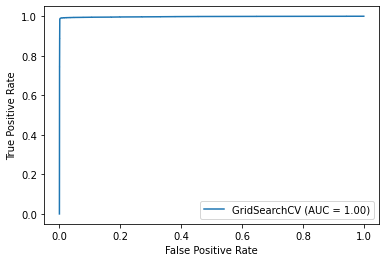

In [276]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logreg_cv, X_test_new, y_test)

# Finalize code

Save the model

In [277]:
import pickle
s = pickle.dumps(logreg_cv)
from joblib import dump, load
dump(logreg_cv, 'models/model_loan.joblib') 

['models/model_loan.joblib']

# Finalize documentation

In [278]:
logreg_cv.cv_results_

{'mean_fit_time': array([0.21673064, 0.38517141, 0.42622113, 0.44404702, 0.44890709]),
 'std_fit_time': array([0.03134006, 0.02626616, 0.01961998, 0.03483612, 0.03295691]),
 'mean_score_time': array([0.00572433, 0.00200229, 0.00339632, 0.0039259 , 0.00139408]),
 'std_score_time': array([0.00575149, 0.0024523 , 0.00279753, 0.0060556 , 0.00173759]),
 'param_C': masked_array(data=[0.001, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.9341    , 0.98646667, 0.99186667, 0.99323333, 0.9934    ]),
 'split1_test_score': array([0.9357    , 0.98613333, 0.99143333, 0.99263333, 0.99303333]),
 'split2_test_score': array([0.93273333, 0.98593333, 0.99093333, 0.99223333, 0.99253333]),
 'split3_test_score': array([0.93646667, 0.98673333, 0.99203333, 0.99333333, 0.99356667]),
 'split4_test_score': array([0.93373333, 0.9866   

In [279]:
logreg_cv.best_params_

{'C': 100}

In [280]:
logreg_cv.best_score_

0.9930866666666667

In [281]:
logreg_cv.best_index_

4

In [282]:
results_df = pd.DataFrame(logreg_cv.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.216731,0.031340,0.005724,0.005751,0.001,{'C': 0.001},0.934100,0.935700,0.932733,0.936467,0.933733,0.934547,0.001354,5
1,0.385171,0.026266,0.002002,0.002452,0.1,{'C': 0.1},0.986467,0.986133,0.985933,0.986733,0.986600,0.986373,0.000297,4
2,0.426221,0.019620,0.003396,0.002798,1,{'C': 1},0.991867,0.991433,0.990933,0.992033,0.991100,0.991473,0.000424,3
3,0.444047,0.034836,0.003926,0.006056,10,{'C': 10},0.993233,0.992633,0.992233,0.993333,0.992667,0.992820,0.000409,2
4,0.448907,0.032957,0.001394,0.001738,100,{'C': 100},0.993400,0.993033,0.992533,0.993567,0.992900,0.993087,0.000367,1


Save model results

In [283]:
results_df.to_csv('models/model_results.csv')